In [1]:
#Find the current working directory
import os
os.getcwd()

'C:\\Users\\Kenny'

In [2]:
#Change the directory: single forward slash or two backward slash
os.chdir('G:/1. Projects/KG - Live/Week_2/Data')

# Looking at User Journey Data 

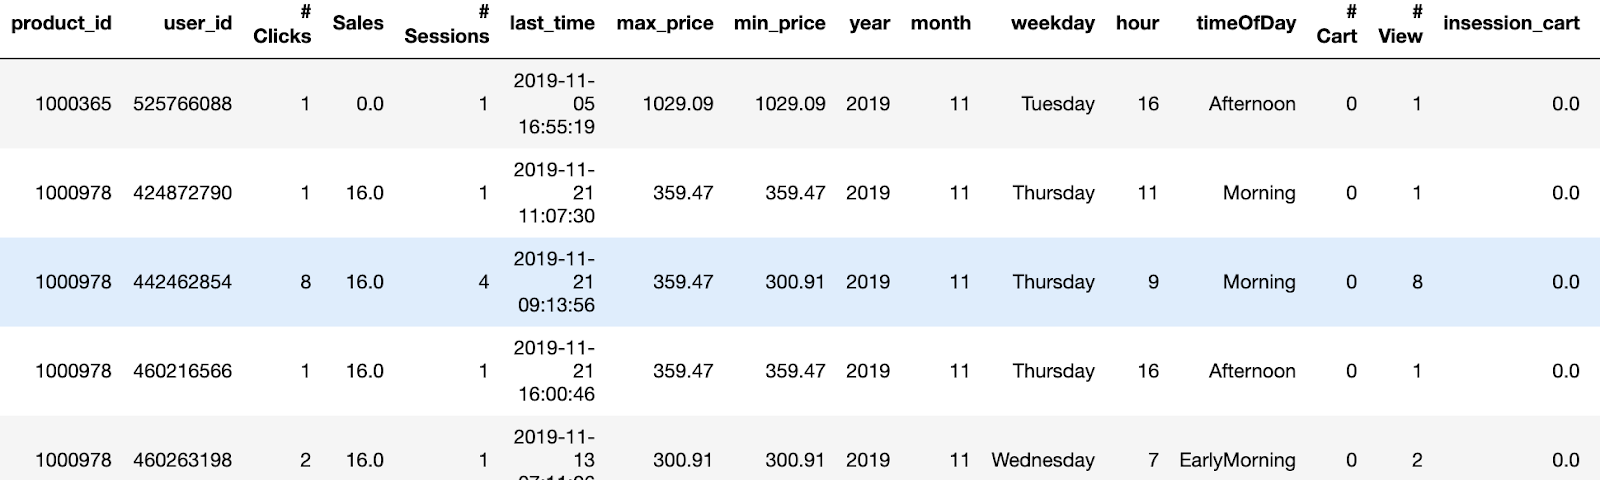

In [3]:
from IPython.display import Image, display
filename = ('user_journey_description.png')
display(Image(filename=filename))

# Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

# Importing Training + Testing Data

In [5]:
train_df = pd.read_csv ('X_train.csv')
train_df.head(5)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,2019,11,Sat,Morning,0,0
1,1,1,0.0,92.67,92.67,0,1,0,1,2019,11,Fr,Dawn,0,0
2,1,1,0.0,155.71,155.71,0,1,0,1,2019,11,Thu,Afternoon,0,0
3,1,1,0.0,898.32,898.32,0,1,0,1,2019,11,Mon,Noon,0,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2019,11,Tue,Noon,0,0


In [6]:
test_df = pd.read_csv ('X_test.csv')
test_df.head(5)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase
0,1,1,0.0,126.86,126.86,0,1,0,1,2019,11,Wed,EarlyMorning,0,0
1,2,2,182.0,118.38,118.38,0,2,0,1,2019,11,Fr,EarlyMorning,0,0
2,1,1,0.0,63.77,63.77,0,1,0,1,2019,11,Fr,Morning,0,0
3,1,1,0.0,32.18,32.18,0,1,0,3,2019,11,Fr,EarlyMorning,0,0
4,1,1,0.0,1093.72,1093.72,0,1,0,2,2019,11,Sat,EarlyMorning,0,0


# Understanding the Data

In [7]:
#The goal of this project is to predict whether a customer/product pair will result in a purchase. 
#As a result, we'll want to identify which features are most important

In [8]:
train_df.dtypes

NumOfEventsInJourney      int64
NumSessions               int64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                   int64
NumView                   int64
InsessionCart             int64
InsessionView             int64
year                      int64
month                     int64
weekday                  object
timeOfDay                object
Weekend                   int64
Purchase                  int64
dtype: object

In [9]:
#Print the unique values for month, year, and weekend features to see if there's any value.
print('    Month:', train_df.month.unique())
print('    Year:', train_df.year.unique())
print('    Weekend:', train_df.Weekend.unique())

    Month: [11]
    Year: [2019]
    Weekend: [0]


In [10]:
#The above variables will be of no value (one unique value per), so let's drop in training and test sets

In [11]:
train_df.drop(columns=['month', 'year', 'Weekend'], inplace=True)
test_df.drop(columns=['month', 'year', 'Weekend'], inplace=True)
print(train_df.shape)
print(test_df.shape)

(645816, 12)
(430544, 12)


In [12]:
#Print the non-numeric features' unique values
print('  Weekday:', train_df.weekday.unique())
print('TimeofDay:', train_df.timeOfDay.unique())

  Weekday: ['Sat' 'Fr' 'Thu' 'Mon' 'Tue' 'Wed' 'Sun']
TimeofDay: ['Morning' 'Dawn' 'Afternoon' 'Noon' 'Evening' 'EarlyMorning' 'Night']


# Training Data Numeric Update

In [13]:
#Converting the non-numeric features to numeric. Training Data
weekday_strings = ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']
weekday_ints = [1, 2, 3, 4, 5, 6, 7]
train_df['weekday'] = train_df['weekday'].replace(weekday_strings, weekday_ints)
train_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,6,Morning,0
1,1,1,0.0,92.67,92.67,0,1,0,1,5,Dawn,0
2,1,1,0.0,155.71,155.71,0,1,0,1,4,Afternoon,0
3,1,1,0.0,898.32,898.32,0,1,0,1,1,Noon,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2,Noon,0


In [14]:
timeOfDay_strings = ['Morning', 'Dawn', 'Afternoon', 'Noon', 'Evening', 'EarlyMorning', 'Night']
timeOfDay_ints = [1, 2, 3, 4, 5, 6, 7]
train_df['timeOfDay'] = train_df['timeOfDay'].replace(timeOfDay_strings, timeOfDay_ints)
train_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,6,1,0
1,1,1,0.0,92.67,92.67,0,1,0,1,5,2,0
2,1,1,0.0,155.71,155.71,0,1,0,1,4,3,0
3,1,1,0.0,898.32,898.32,0,1,0,1,1,4,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2,4,0


# Testing Data Numeric Update

In [15]:
test_df['weekday'] = test_df['weekday'].replace(weekday_strings, weekday_ints)
test_df['timeOfDay'] = test_df['timeOfDay'].replace(timeOfDay_strings, timeOfDay_ints)
test_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,126.86,126.86,0,1,0,1,3,6,0
1,2,2,182.0,118.38,118.38,0,2,0,1,5,6,0
2,1,1,0.0,63.77,63.77,0,1,0,1,5,1,0
3,1,1,0.0,32.18,32.18,0,1,0,3,5,6,0
4,1,1,0.0,1093.72,1093.72,0,1,0,2,6,6,0


# Balanced Data Check

In [16]:
print("Number of Purchases vs. Non-Purchases in Train Set:")
print(train_df.Purchase.value_counts())
print("Percent of Rows Resulting in Purchase:", train_df.Purchase.value_counts()[1] / train_df.shape[0] * 100)
print("------------")
print("Number of Purchases vs. Non-Purchases in Test Set:")
print(test_df.Purchase.value_counts())
print("Percent of Rows Resulting in Purchase:", test_df.Purchase.value_counts()[1] / test_df.shape[0] * 100)

Number of Purchases vs. Non-Purchases in Train Set:
0    636839
1      8977
Name: Purchase, dtype: int64
Percent of Rows Resulting in Purchase: 1.3900244032355966
------------
Number of Purchases vs. Non-Purchases in Test Set:
0    424424
1      6120
Name: Purchase, dtype: int64
Percent of Rows Resulting in Purchase: 1.421457504924003


In [17]:
#The Training + Test sets are close to balanced, but not completely so we will need to account for this later.

# Feature Analysis

In [18]:
#Checking on number of features; less response variable
print(f'The Training data currently has {train_df.shape[1] - 1} features')

The Training data currently has 11 features


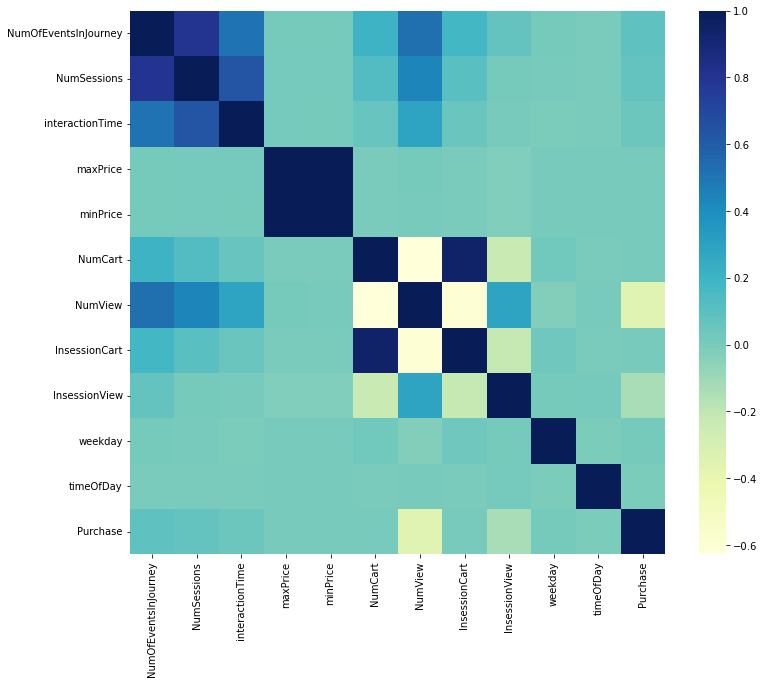

In [19]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, cmap='YlGnBu');

In [20]:
#Dropping the second feature if two are highly correlaated (above 0.8)
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i,j]) >= 0.8):
            keep_columns[j] = False
selected_columns = train_df.columns[keep_columns]
train_df_reduced = train_df[selected_columns]

In [21]:
#Updated feature count
print(f'The Training data now has {train_df_reduced.shape[1] - 1} features')

The Training data now has 8 features


In [22]:
#Updating features in Test set
test_df_reduced = test_df[selected_columns]

print(f'The Testing data now has {test_df_reduced.shape[1] - 1} features')

The Testing data now has 8 features


C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

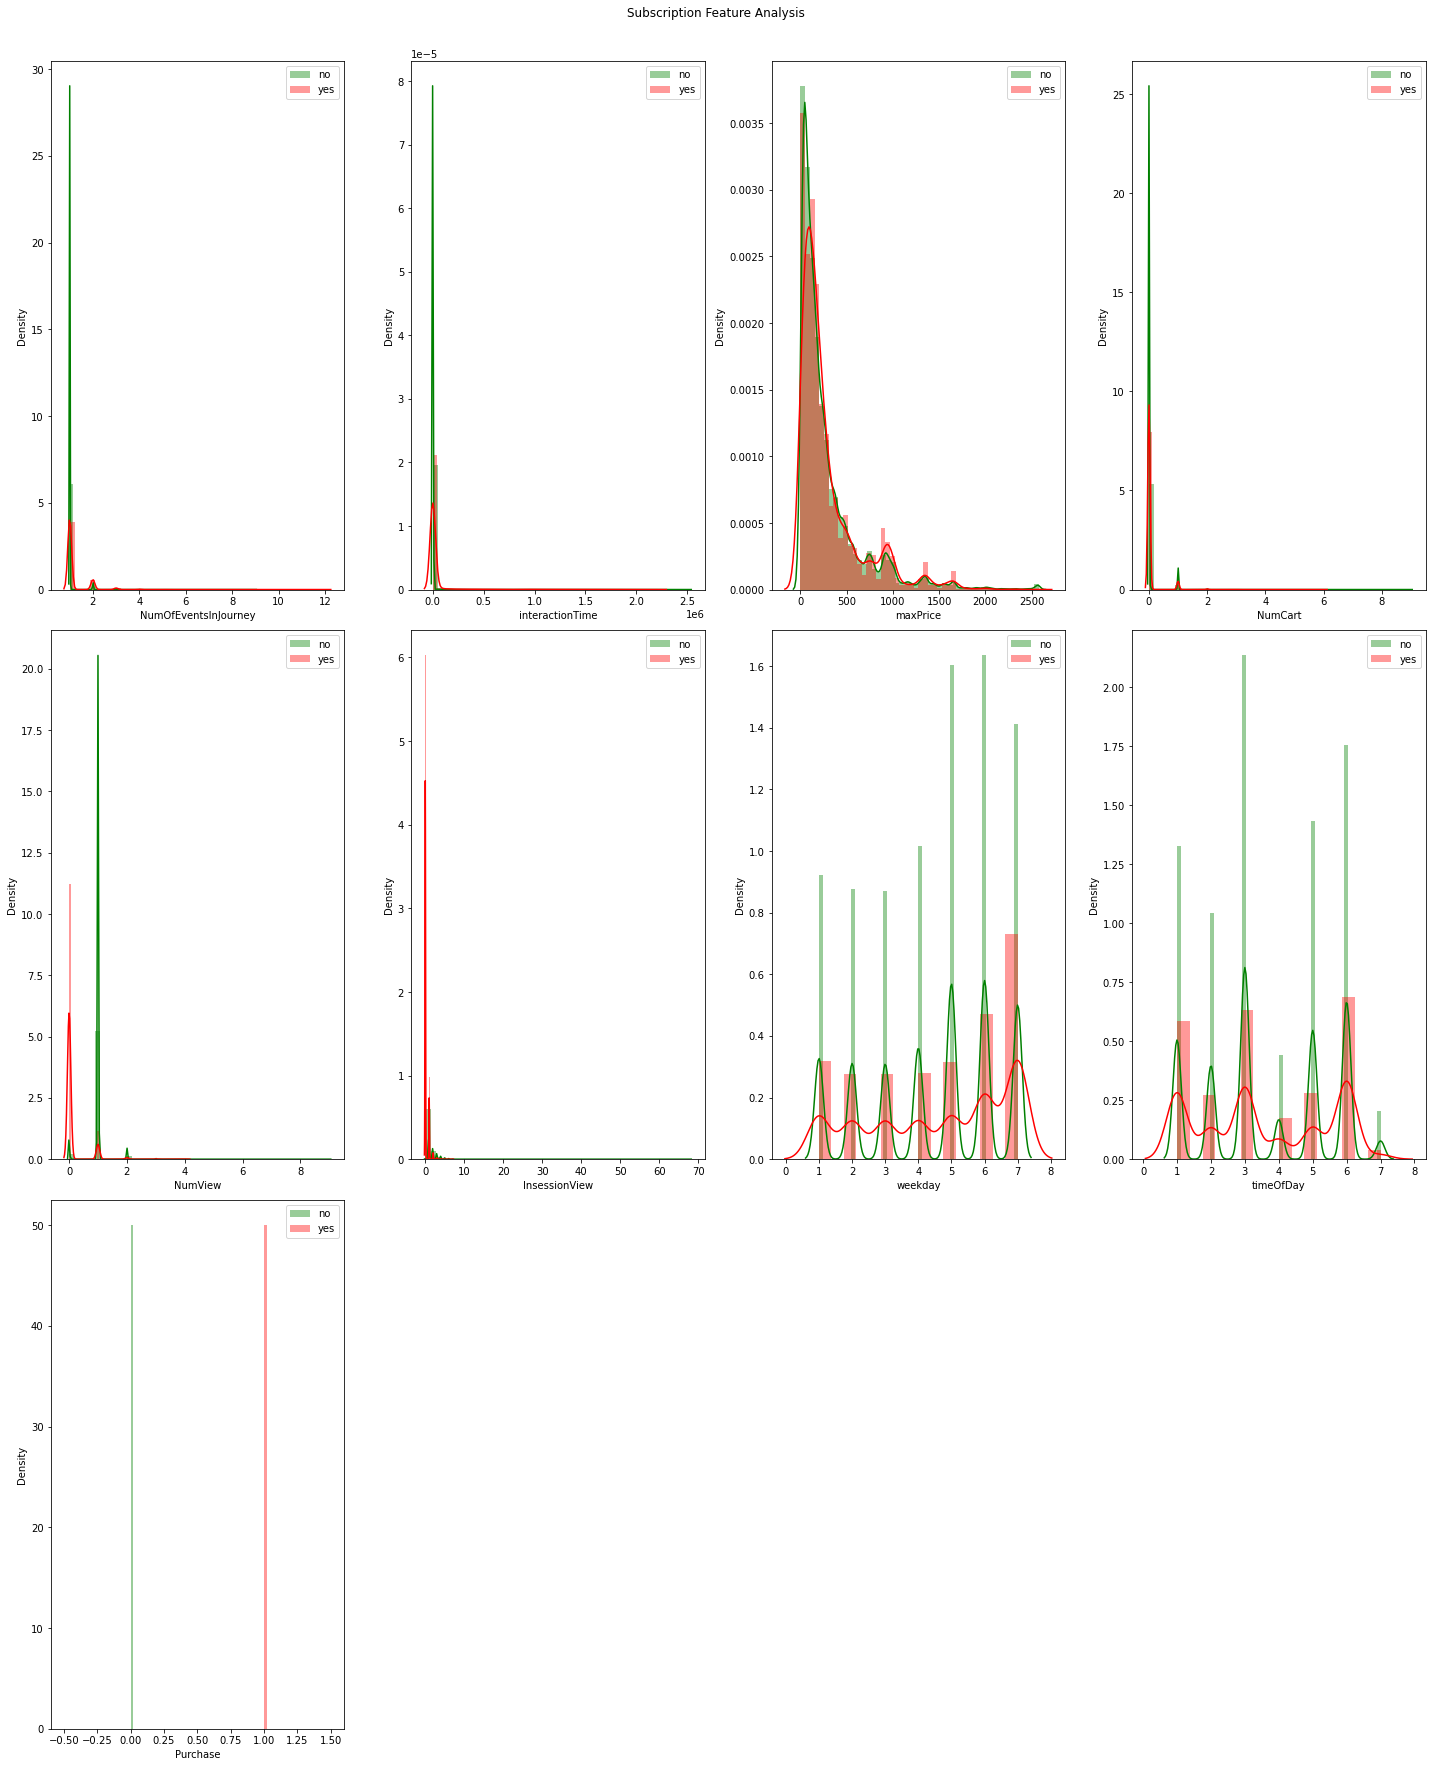

In [23]:
#Visualization of Features
fig = plt.figure(figsize=(20, 25))
j = 0
for i in train_df_reduced.columns:
    plt.subplot(3, 4, j + 1)
    j += 1
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 0], color='g', label='no')
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

# Creating Numpy Arrays for Training + Test sets

In [24]:
y_train = train_df_reduced['Purchase'].values
y_test = test_df_reduced['Purchase'].values
X_train_reduced = train_df_reduced.drop(columns='Purchase').values
X_test_reduced = test_df_reduced.drop(columns='Purchase').values

# Normalizing Features

In [25]:
X_train_reduced = normalize(X_train_reduced, axis=0, norm='max')
X_test_reduced = normalize(X_test_reduced, axis=0, norm='max')

# Random Forest -- Feature Rank/Importance

Feature ranking:
1. NumView (Feature 4) (0.435352)
2. NumCart (Feature 3) (0.418249)
3. InsessionView (Feature 5) (0.091935)
4. NumOfEventsInJourney (Feature 0) (0.032710)
5. interactionTime (Feature 1) (0.009555)
6. weekday (Feature 6) (0.004835)
7. maxPrice (Feature 2) (0.004657)
8. timeOfDay (Feature 7) (0.002706)


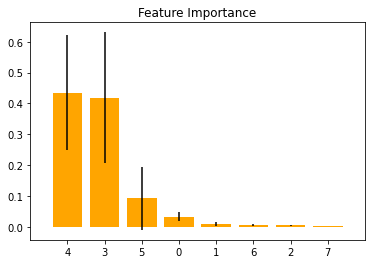

In [26]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20, random_state=0)

forest.fit(X_train_reduced, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_reduced.shape[1]):
    print("%d. %s (Feature %d) (%f)" %
          (f + 1, train_df_reduced.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train_reduced.shape[1]), importances[indices],
        color="orange", yerr=std[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]]);

In [27]:
#Features 3 and 4 are the two most important features according to the Random Forest model.
#I decided to use these two features, along with Feature 1 (interaction time) for visualization purposes.

In [28]:
#Creating a function to later visualize the classification output
#Confusion matrix has four types of output: True Positive, True Negative, False Negative, and False Positive

def visualize_scatter_plot(X, y, yhat, title):
    loc11 = np.where((y > 0) & (yhat > 0), 1, 0) #True Positive
    loc00 = np.where((y == 0) & (yhat == 0), 1, 0) #True Negative
    loc10 = np.where((y > 0) & (yhat == 0), 1, 0) #False Negative
    loc01 = np.where((y == 0) & (yhat > 0), 1, 0) #False Positive
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    ax.scatter3D(
        X[np.where(loc00 > 0), 3],
        X[np.where(loc00 > 0), 4],
        X[np.where(loc00 > 0), 1],
        color='blue',
        marker='o')
    ax.scatter3D(
        X[np.where(loc10 > 0), 3],
        X[np.where(loc10 > 0), 4],
        X[np.where(loc10 > 0), 1],
        color='cyan',
        marker='o')
    ax.scatter3D(
        X[np.where(loc11 > 0), 3],
        X[np.where(loc11 > 0), 4],
        X[np.where(loc11 > 0), 1],
        color='orange',
        marker='^')
    ax.scatter3D(
        X[np.where(loc01 > 0), 3],
        X[np.where(loc01 > 0), 4],
        X[np.where(loc01 > 0), 1],
        color='green',
        marker='^')
    ax.set_xlabel('NumCart')
    ax.set_ylabel('NumViews')
    ax.set_zlabel('InteractionTime')
    plt.title(title)
    plt.show()

# Building Logistic Regression (LR) Model

In [29]:
lr_model = LogisticRegression(random_state = 0, class_weight = 'balanced').fit(X_train_reduced, y_train)
lr_pred = lr_model.predict(X_test_reduced)

In [30]:
#Calculating classification metrics for the LR model
print("Accuracy:", accuracy(y_test, lr_pred))
print("Precision:", precision(y_test, lr_pred))
print("Recall:", recall(y_test, lr_pred))
print("F1 score:", f1_score(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

Accuracy: 0.9990546843063659
Precision: 0.9462583971254491
Recall: 0.9897058823529412
F1 score: 0.9674946090567846
Confusion Matrix:
[[424080    344]
 [    63   6057]]


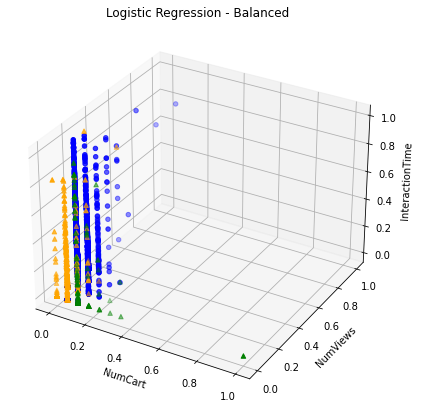

In [31]:
#Visualizing the performance of the LR model
visualize_scatter_plot(X_test_reduced, y_test, lr_pred, 'Logistic Regression - Balanced')

# Building Support Vector Machines (SVM) Model

In [32]:
svm_model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-2, class_weight='balanced'))
svm_model.fit(X_train_reduced, y_train)
svm_pred = svm_model.predict(X_test_reduced)

In [33]:
#Calculating classification metrics for the SVM model
print("Accuracy:", accuracy(y_test, svm_pred))
print("Precision:", precision(y_test, svm_pred))
print("Recall:", recall(y_test, svm_pred))
print("F1 score:", f1_score(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

Accuracy: 0.9997932847746107
Precision: 0.9952373131877156
Recall: 0.9901960784313726
F1 score: 0.9927102956835121
Confusion Matrix:
[[424395     29]
 [    60   6060]]


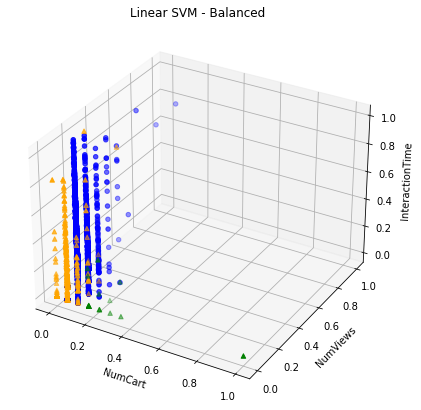

In [34]:
#Visualizing the performance of the SVM model
visualize_scatter_plot(X_test_reduced, y_test, svm_pred, 'Linear SVM - Balanced')

# Non-Linear Classifier - Gradient Boosted Tree (GBT)

In [35]:
gbt_model = GradientBoostingClassifier(random_state=1)
gbt_model.fit(X_train_reduced, y_train)
gbt_pred = gbt_model.predict(X_test_reduced)

In [36]:
#Calculating classification metrics for the GBT model
print("Accuracy:", accuracy(y_test, gbt_pred))
print("Precision:", precision(y_test, gbt_pred))
print("Recall:", recall(y_test, gbt_pred))
print("F1 score:", f1_score(y_test, gbt_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbt_pred))

Accuracy: 0.9990802333791668
Precision: 0.9542857142857143
Recall: 0.9823529411764705
F1 score: 0.9681159420289855
Confusion Matrix:
[[424136    288]
 [   108   6012]]


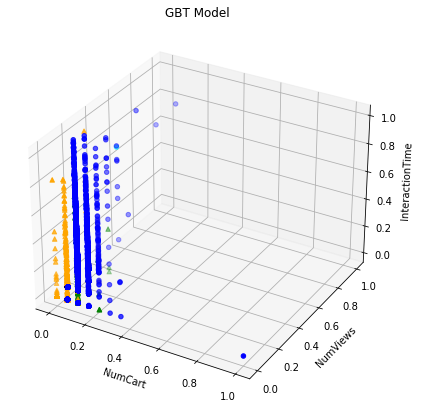

In [37]:
#Visualizing the performance of the GBT model
visualize_scatter_plot(X_test_reduced, y_test, gbt_pred, 'GBT Model')

# Random Forest Classifier (RFC)

In [38]:
rf_model_b = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
rf_model_b.fit(X_train_reduced, y_train)
rf_pred_b = rf_model_b.predict(X_test_reduced)

In [39]:
#Calculating classification metrics for the RFC model
print("Accuracy:", accuracy(y_test, rf_pred_b))
print("Precision:", precision(y_test, rf_pred_b))
print("Recall:", recall(y_test, rf_pred_b))
print("F1 score:", f1_score(y_test, rf_pred_b))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_b))

Accuracy: 0.9972848303541566
Precision: 0.9006311700922479
Recall: 0.9093137254901961
F1 score: 0.9049516220830961
Confusion Matrix:
[[423810    614]
 [   555   5565]]


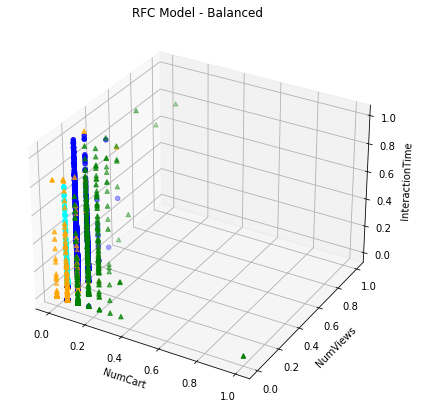

In [40]:
#Visualizing the performance of the RFC model
visualize_scatter_plot(X_test_reduced, y_test, rf_pred_b, 'RFC Model - Balanced')